In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
import warnings

sns.set_style("whitegrid")
warnings.filterwarnings('ignore')

In [2]:
lockdown = pd.read_csv("lockdown_us.csv")
lockdown.head(10)

,Country,State,County,Date,Type
0,United States,Alabama,NaN,2020-04-04,Stay at home
1,United States,Alabama,Birmingham,2020-03-24,Shelter in place
2,United States,Alaska,NaN,2020-03-28,Stay at home
3,United States,Arizona,NaN,2020-03-31,Stay at home
4,United States,California,NaN,2020-03-19,Stay at home
5,United States,Colorado,NaN,2020-03-26,Stay at home
6,United States,Connecticut,NaN,2020-03-23,Stay at home
7,United States,Delaware,NaN,2020-03-24,Shelter in place
8,United States,District of Columbia,NaN,2020-04-01,Stay at home
9,United States,Florida,NaN,2020-04-03,Stay at home


In [3]:
# Cleaning the lockdown dates dataset.

lockdown_c = lockdown[lockdown['County'].isnull()].drop(columns=['Country','County'])
lockdown_c = lockdown_c[lockdown_c["State"] != "Puerto Rico"]
lockdown_c = lockdown_c.rename(columns={"State": "state", "Date": "lockdown_start", "Type": "lockdown_type"}).replace({'Stay at home': 0, 'Shelter in place': 1})

lockdown_c["lockdown_end"] = ["2020-04-30", "2020-04-24", "2020-05-15", "2021-06-15", "2020-04-27", "2020-05-20", "2020-05-15", 
                              "2020-05-15", "2020-05-04", "2020-04-24", "2020-05-31", "2020-04-30", "2020-05-30", "2020-05-01", 
                              "2020-05-03", "2020-06-29", "2020-05-14", "2020-05-31", "2020-05-15", "2020-05-18", "2020-06-05", 
                              "2020-05-04", "2020-05-11", "2020-05-03", "2020-04-24", "2020-05-15", "2020-06-15", "2020-06-09", 
                              "2020-05-15", "2020-05-15", "2020-05-08", "2020-05-29", "2020-06-19", "2020-05-08", "2020-05-08", 
                              "2020-05-04", "2020-04-30", "2020-05-01", "2020-05-15", "2020-06-10", "2020-05-31", "2020-05-04", "2020-05-26"]

lockdown_c = lockdown_c[["state", "lockdown_start", "lockdown_end", "lockdown_type"]]

lockdown_c["lockdown_start"] = pd.to_datetime(lockdown_c["lockdown_start"], format='%Y-%m-%d')
lockdown_c["lockdown_end"] = pd.to_datetime(lockdown_c["lockdown_end"], format='%Y-%m-%d')
lockdown_c["lockdown_duration"] = (lockdown_c["lockdown_end"] - lockdown_c["lockdown_start"]).dt.days

lockdown_c = lockdown_c.sort_values(by="lockdown_duration", ascending=False)
lockdown_c.head(10)

,state,lockdown_start,lockdown_end,lockdown_type,lockdown_duration
4,California,2020-03-19,2021-06-15,0,453
44,Kentucky,2020-03-26,2020-06-29,0,95
88,Oregon,2020-03-23,2020-06-19,0,88
74,New Jersey,2020-03-21,2020-06-09,0,80
73,New Hampshire,2020-03-28,2020-06-15,0,79
50,Michigan,2020-03-24,2020-06-05,0,73
168,Virginia,2020-03-30,2020-06-10,0,72
41,Illinois,2020-03-21,2020-05-30,0,70
169,Washington,2020-03-23,2020-05-31,0,69
39,Hawaii,2020-03-25,2020-05-31,0,67


States Chosen: California, Kentucky, New Jersey, New Hampshire, Washington, Georgia, South Carolina, Alabama, Florida, Texas

In [4]:
states_of_interest = ["California", "Kentucky", "Washington", "New Jersey", "New Hampshire", "Georgia", "South Carolina", "Alabama", "Florida", "Texas"]

lockdown_j = lockdown_c[lockdown_c["state"].isin(states_of_interest)]
lockdown_j

,state,lockdown_start,lockdown_end,lockdown_type,lockdown_duration
4,California,2020-03-19,2021-06-15,0,453
44,Kentucky,2020-03-26,2020-06-29,0,95
74,New Jersey,2020-03-21,2020-06-09,0,80
73,New Hampshire,2020-03-28,2020-06-15,0,79
169,Washington,2020-03-23,2020-05-31,0,69
9,Florida,2020-04-03,2020-05-04,0,31
126,Texas,2020-04-02,2020-05-01,0,29
118,South Carolina,2020-04-07,2020-05-04,0,27
0,Alabama,2020-04-04,2020-04-30,0,26
21,Georgia,2020-04-03,2020-04-24,1,21


In [5]:
flights = pd.read_csv("jantojun2020.csv")
flights.head(10)

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,MKT_UNIQUE_CARRIER,MKT_CARRIER_FL_NUM,TAIL_NUM,ORIGIN,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2020,1,1,1,3,1/1/2020,WN,5888,N951WN,ONT,...,95.0,122.0,74.0,363,2,8.0,0.0,27.0,0.0,33.0
1,2020,1,1,1,3,1/1/2020,WN,6276,N467WN,ONT,...,90.0,92.0,71.0,363,2,NaN,NaN,NaN,NaN,NaN
2,2020,1,1,1,3,1/1/2020,WN,4598,N7885A,ONT,...,70.0,68.0,57.0,333,2,NaN,NaN,NaN,NaN,NaN
3,2020,1,1,1,3,1/1/2020,WN,4761,N551WN,ONT,...,75.0,75.0,63.0,333,2,NaN,NaN,NaN,NaN,NaN
4,2020,1,1,1,3,1/1/2020,WN,5162,N968WN,ONT,...,80.0,67.0,57.0,333,2,NaN,NaN,NaN,NaN,NaN
5,2020,1,1,1,3,1/1/2020,WN,5684,N7856A,ONT,...,75.0,80.0,57.0,333,2,NaN,NaN,NaN,NaN,NaN
6,2020,1,1,1,3,1/1/2020,WN,6152,N7735A,ONT,...,80.0,72.0,62.0,333,2,NaN,NaN,NaN,NaN,NaN
7,2020,1,1,1,3,1/1/2020,WN,1679,N405WN,ONT,...,85.0,73.0,66.0,390,2,0.0,0.0,0.0,7.0,40.0
8,2020,1,1,1,3,1/1/2020,WN,3479,N489WN,ONT,...,85.0,100.0,73.0,390,2,NaN,NaN,NaN,NaN,NaN
9,2020,1,1,1,3,1/1/2020,WN,4069,N7708E,ONT,...,80.0,84.0,71.0,390,2,NaN,NaN,NaN,NaN,NaN


In [6]:
# Cleaning the flight delays dataset.

airports_of_interest = ["LAX", "CVG", "SEA", "EWR", "MHT", "ATL", "GSP", "BHM", "MCO", "DFW"]
months = ["January", "February", "March", "April", "May", "June"]

flights_c = flights[["ORIGIN_STATE_NM", "ORIGIN", "DEST_STATE_NM", "DEST", "FL_DATE", "MONTH", "DISTANCE", "CANCELLED", "DEP_DELAY_GROUP"]]
flights_c = flights_c.rename(columns={"ORIGIN_STATE_NM": "orig_state", "ORIGIN": "orig_airport", "DEST_STATE_NM": "dest_state", 
                                      "DEST": "dest_airport", "FL_DATE": "flight_date", "MONTH": "flight_month", 
                                      "DISTANCE": "distance", "CANCELLED": "cancelled", "DEP_DELAY_GROUP": "dep_delay_15"})

flights_c["cancelled"] = flights_c["cancelled"].astype(bool)
flights_c["flight_date"] = pd.to_datetime(flights_c["flight_date"], format='%m/%d/%Y')
flights_c["flight_month"] = flights_c["flight_month"].replace({1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June"})
flights_c["flight_month"] = pd.Categorical(flights_c["flight_month"], categories=months, ordered=True)

flights_c

,orig_state,orig_airport,dest_state,dest_airport,flight_date,flight_month,distance,cancelled,dep_delay_15
0,California,ONT,California,SFO,2020-01-01,January,363,False,2.0
1,California,ONT,California,SFO,2020-01-01,January,363,False,-1.0
2,California,ONT,California,SJC,2020-01-01,January,333,False,-1.0
3,California,ONT,California,SJC,2020-01-01,January,333,False,0.0
4,California,ONT,California,SJC,2020-01-01,January,333,False,0.0
...,...,...,...,...,...,...,...,...,...
2745842,Washington,SEA,Hawaii,HNL,2020-06-13,June,2677,False,-1.0
2745843,Arizona,PHX,Washington,SEA,2020-06-13,June,1107,False,-1.0
2745844,Washington,SEA,Arizona,PHX,2020-06-13,June,1107,False,-1.0
2745845,California,SNA,Washington,SEA,2020-06-13,June,978,False,-1.0


In the merged datasets below, I've added a new `lockdown_flight` variable that represents whether a flight was scheduled during a lockdown order or not. This variable accounts for the each state's unique lockdown duration, so there shouldn't be issues with its accuracy.

In [7]:
# Merged dataset w/ lockdown dataset focusing on the flights that departed from the states of interest.

flights_orig = flights_c[flights_c["orig_state"].isin(states_of_interest)]
flights_orig = flights_orig[flights_orig["orig_airport"].isin(airports_of_interest)]

flights_orig_m = flights_orig.merge(lockdown_c, left_on="orig_state", right_on="state", how="left")
flights_orig_m = flights_orig_m.drop(columns=["dest_state", "dest_airport", "state"])

flights_orig_m["lockdown_flight"] = ((flights_orig_m["lockdown_start"] < flights_orig_m["flight_date"]) & (flights_orig_m["lockdown_end"] > flights_orig_m["flight_date"]))

flights_orig_m.head()

,orig_state,orig_airport,flight_date,flight_month,distance,cancelled,dep_delay_15,lockdown_start,lockdown_end,lockdown_type,lockdown_duration,lockdown_flight
0,Washington,SEA,2020-01-01,January,2335,False,0.0,2020-03-23,2020-05-31,0,69,False
1,Washington,SEA,2020-01-01,January,1670,False,1.0,2020-03-23,2020-05-31,0,69,False
2,Washington,SEA,2020-01-01,January,1024,False,0.0,2020-03-23,2020-05-31,0,69,False
3,Washington,SEA,2020-01-01,January,1024,False,-1.0,2020-03-23,2020-05-31,0,69,False
4,Washington,SEA,2020-01-01,January,1024,False,0.0,2020-03-23,2020-05-31,0,69,False


In [8]:
# Merged dataset w/ lockdown dataset focusing on the flights that arrived (intended to arrive, if cancelled) in the states of interest.

flights_dest = flights_c[flights_c["dest_state"].isin(states_of_interest)]
flights_dest = flights_dest[flights_dest["dest_airport"].isin(airports_of_interest)]

flights_dest_m = flights_dest.merge(lockdown_c, left_on="dest_state", right_on="state", how="left")
flights_dest_m = flights_dest_m.drop(columns=["orig_state", "orig_airport", "state"])

flights_dest_m["lockdown_flight"] = ((flights_dest_m["lockdown_start"] < flights_dest_m["flight_date"]) & (flights_dest_m["lockdown_end"] > flights_dest_m["flight_date"]))

flights_dest_m.head()

,dest_state,dest_airport,flight_date,flight_month,distance,cancelled,dep_delay_15,lockdown_start,lockdown_end,lockdown_type,lockdown_duration,lockdown_flight
0,Florida,MCO,2020-01-01,January,655,False,-1.0,2020-04-03,2020-05-04,0,31,False
1,Georgia,ATL,2020-01-01,January,545,False,-1.0,2020-04-03,2020-04-24,1,21,False
2,California,LAX,2020-01-01,January,834,False,1.0,2020-03-19,2021-06-15,0,453,False
3,California,LAX,2020-01-01,January,834,False,0.0,2020-03-19,2021-06-15,0,453,False
4,Georgia,ATL,2020-01-01,January,666,False,0.0,2020-04-03,2020-04-24,1,21,False


<h3>IMPORTANT! Consider dropping flights taking place in June because we only have data up to the 13th. However, without dropping, we can still see an uptick in flight amounts despite having only half a month's worth of data; many states did end lockdown orders in May/June so this could be of importance.</h3>

In the plot below, I've plotted the total number of flights per month for each state of interest.

We can see a trend here that the number of flights in each state definitely did decrease once lockdowns started to go into effect (the steepest drop is observed in April).

<Figure size 1152x432 with 0 Axes>

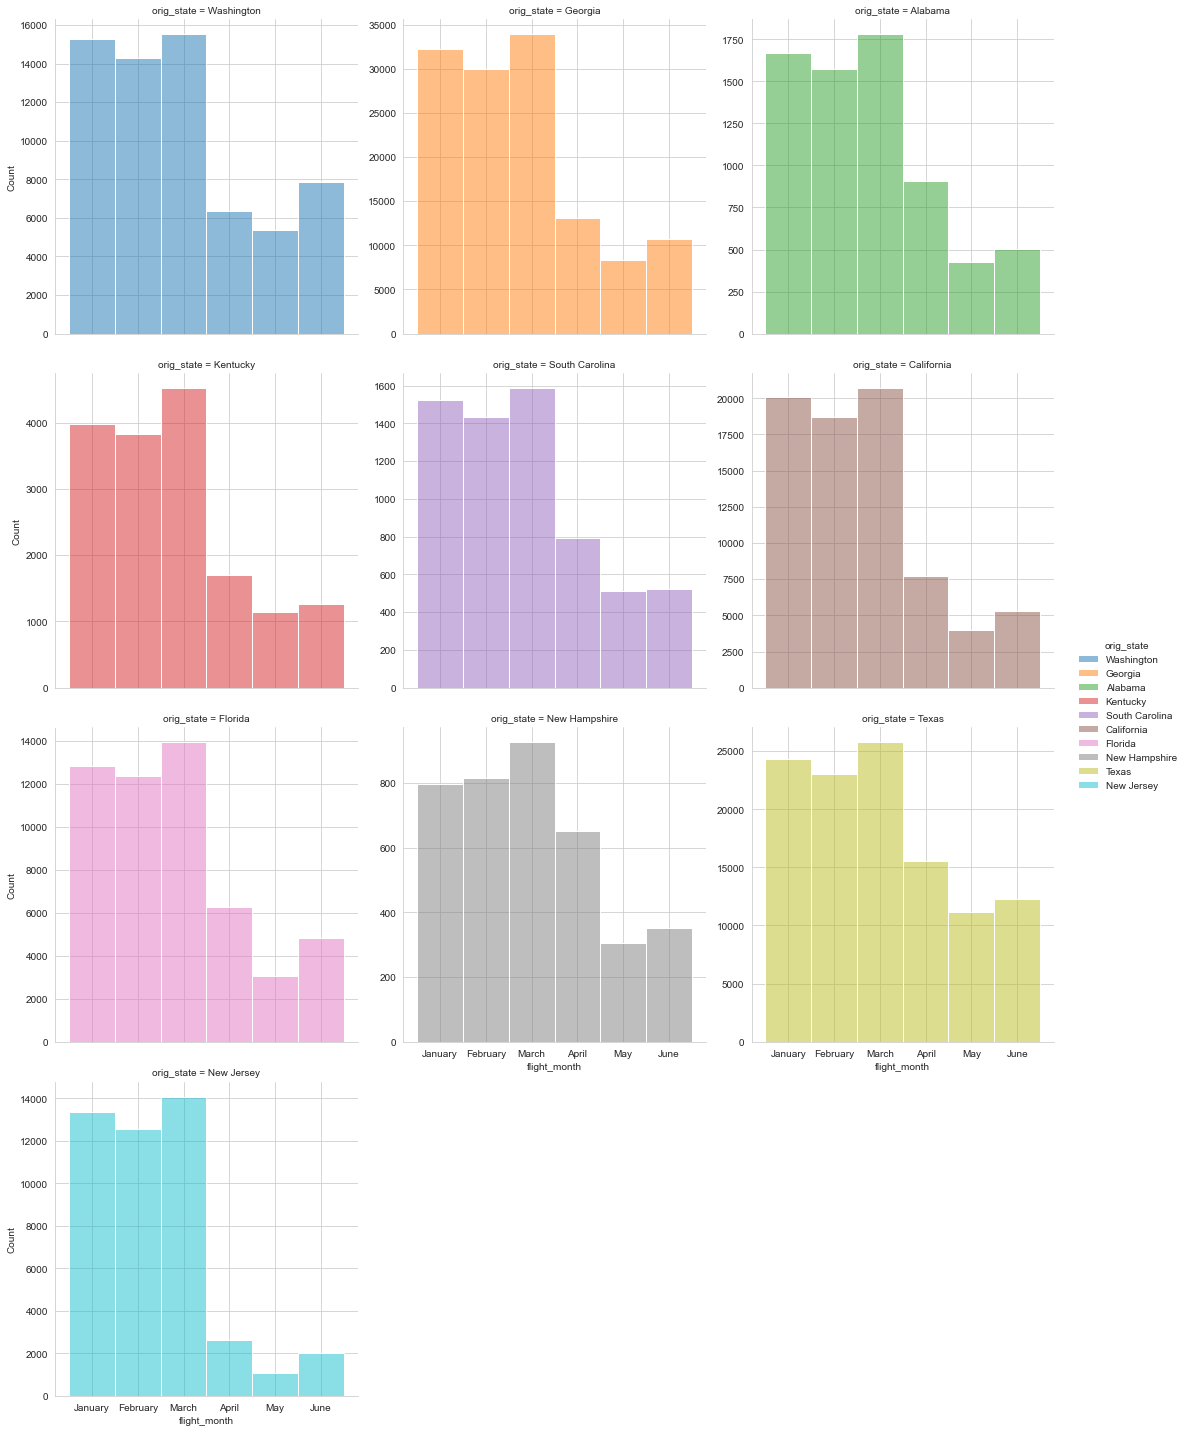

In [9]:
plt.figure(figsize=(16, 6))
sns.displot(data=flights_orig_m, x="flight_month", hue="orig_state", col="orig_state", col_wrap=3, facet_kws=dict(sharey=False));

In the plot below, I've calculated the percentage of flights that were cancelled during and not during lockdown orders for each state. We can definitely see that a much higher percentage of total flights were cancelled if they were scheduled during lockdown.

In [10]:
cancelled_p = flights_orig_m.groupby(['orig_state', 'lockdown_flight']).agg({'cancelled': (lambda x: np.sum(x) / len(x))}).reset_index()
cancelled_p.head()

,orig_state,lockdown_flight,cancelled
0,Alabama,False,0.076948
1,Alabama,True,0.428371
2,California,False,0.010356
3,California,True,0.245981
4,Florida,False,0.059852


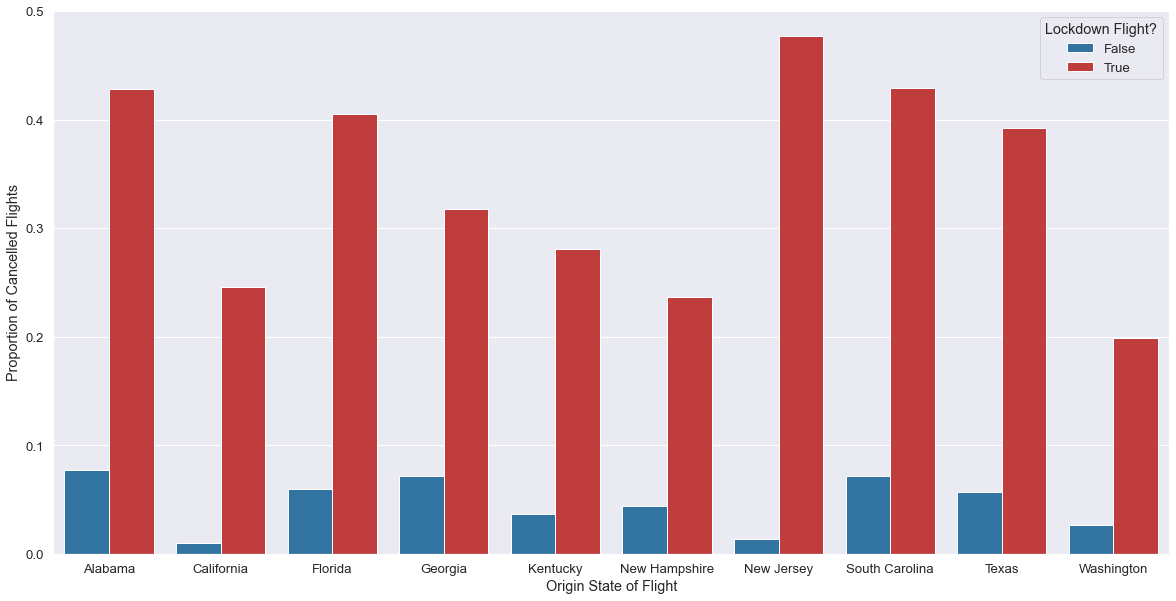

In [11]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.2)
ax = sns.barplot(data=cancelled_p, x="orig_state", y="cancelled", hue="lockdown_flight", palette=['tab:blue', 'tab:red'])
ax.set(xlabel="Origin State of Flight", ylabel="Proportion of Cancelled Flights")
ax.legend(title="Lockdown Flight?");

TODO: Look into relationships for flights where they arrived in the states of interest?

Other potential time based relationships?